In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("Salary_Data.csv")
print("Data imported successfully!!!!!")

Data imported successfully!!!!!


In [3]:
data.shape

(30, 2)

In [4]:
data

YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0

In [5]:
import pandas_profiling
profile = data.profile_report(title='Profile Report')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x2e8837cd820>,
 'caps': [<matplotlib.lines.Line2D at 0x2e883802250>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e8838029d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2e8837b8a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e8837b8400>],
 'means': []}

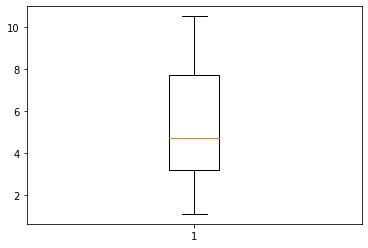

In [7]:
plt.boxplot(data['YearsExperience'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

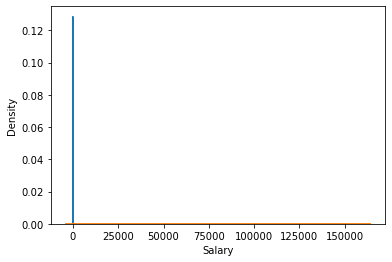

In [8]:
sns.distplot(data['YearsExperience'])
sns.distplot(data['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

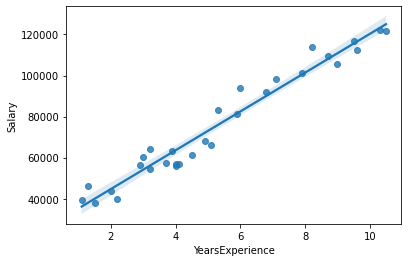

In [9]:
sns.regplot(x="YearsExperience", y="Salary", data = data)

In [10]:
import statsmodels.formula.api as smf

In [11]:
reg=smf.ols("Salary~YearsExperience",data=data).fit()
print(reg.params)
print(reg.tvalues)
print(reg.pvalues)
print(reg.rsquared,reg.rsquared_adj)
print(reg.summary())
residual=reg.resid
print(residual.mean())

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64
Intercept          11.346940
YearsExperience    24.950094
dtype: float64
Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64
0.9569566641435086 0.9554194021486339
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           1.14e-20
Time:                        19:45:57   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:    

In [12]:
data["log_YearsExperience"]=np.log(data["YearsExperience"])
reg_log = smf.ols("Salary~log_YearsExperience",data=data).fit()  # Regression using logarthmic transformation
print(reg_log.params)
print(reg_log.tvalues)
print(reg_log.pvalues)
print((reg_log.rsquared,reg_log.rsquared_adj))
print(reg_log.summary())
residual=reg_log.resid
print(residual.mean())

Intercept              14927.97177
log_YearsExperience    40581.98796
dtype: float64
Intercept               2.895135
log_YearsExperience    12.791989
dtype: float64
Intercept              7.268813e-03
log_YearsExperience    3.250155e-13
dtype: float64
(0.8538888828756969, 0.8486706286926861)
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           3.25e-13
Time:                        19:46:00   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                     

In [13]:
# Exponential model 
data["reg_exp"] = np.log(data["Salary"])
reg_exp = smf.ols("reg_exp~YearsExperience",data=data).fit() # regression using Exponential model
print(reg_exp.params)
print(reg_exp.tvalues)
print(reg_exp.pvalues)
print((reg_exp.rsquared,reg_exp.rsquared_adj))
print(reg_exp.summary())
residual=reg_exp.resid
print(residual.mean())

Intercept          10.507402
YearsExperience     0.125453
dtype: float64
Intercept          273.327166
YearsExperience     19.584833
dtype: float64
Intercept          1.604634e-49
YearsExperience    7.027439e-18
dtype: float64
(0.9319671194084195, 0.9295373736730059)
                            OLS Regression Results                            
Dep. Variable:                reg_exp   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           7.03e-18
Time:                        19:46:04   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:     

In [14]:
data["YearsExperience_square"]=data["YearsExperience"]*2
quad_mod  = smf.ols("Salary~YearsExperience_square",data=data).fit() # regression using Quadratic modell
print(quad_mod.params)
print(quad_mod.tvalues)
print(quad_mod.pvalues)
print((quad_mod.rsquared,quad_mod.rsquared_adj))
print(quad_mod.summary())
residual=quad_mod.resid
print(residual.mean())

Intercept                 25792.200199
YearsExperience_square     4724.981161
dtype: float64
Intercept                 11.346940
YearsExperience_square    24.950094
dtype: float64
Intercept                 5.511950e-12
YearsExperience_square    1.143068e-20
dtype: float64
(0.9569566641435086, 0.9554194021486339)
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           1.14e-20
Time:                        19:46:07   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                 

In [15]:
quad_mod2  = smf.ols("Salary~YearsExperience+YearsExperience_square",data=data).fit() # regression using Quadratic modell
print(quad_mod2.params)
print(quad_mod2.tvalues)
print(quad_mod2.pvalues)
print((quad_mod2.rsquared,quad_mod2.rsquared_adj))
print(quad_mod2.summary())
residual=quad_mod2.resid
print(residual.mean())

Intercept                 25792.200199
YearsExperience            1889.992464
YearsExperience_square     3779.984929
dtype: float64
Intercept                 11.346940
YearsExperience           24.950094
YearsExperience_square    24.950094
dtype: float64
Intercept                 5.511950e-12
YearsExperience           1.143068e-20
YearsExperience_square    1.143068e-20
dtype: float64
(0.9569566641435086, 0.9554194021486339)
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           1.14e-20
Time:                        19:47:09   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:      